AstWordle: Astronomy meets Wordle. 


choose your difficulty: easy, hard or ULTRAkill!!!:  easy


you have 6 tries. after 3, you will be offered a hint.


Enter a 5-letter word:  steak


in STEAK, S is not in the word
in STEAK, T is correct but in the wrong position
in STEAK, E is not in the word
in STEAK, A is not in the word
in STEAK, K is not in the word
letters guessed so far:
A E K S T
you have 5 guesses left


Enter a 5-letter word:  orbit


 congratulations you did it!! the word was ORBIT. you guessed it on guess #2
{0} {1} {0} {0} {0} {0}


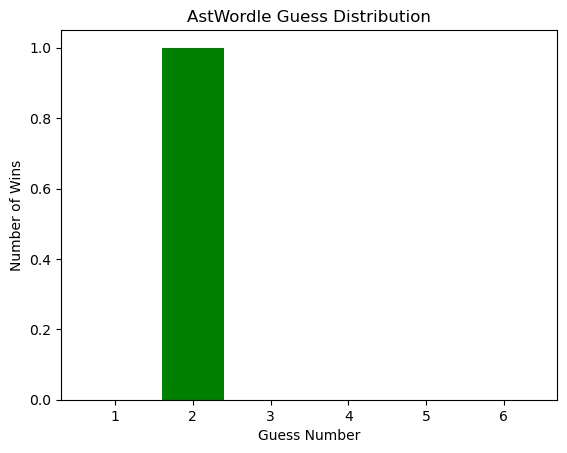

play again? yes/no:  yes
play again? yes/no:  yes
choose your difficulty: easy, hard or ULTRAkill!!!:  easy


you have 6 tries. after 3, you will be offered a hint.


Enter a 5-letter word:  steak


in STEAK, S is not in the word
in STEAK, T is correct but in the wrong position
in STEAK, E is not in the word
in STEAK, A is not in the word
in STEAK, K is not in the word
letters guessed so far:
A E K S T
you have 5 guesses left


Enter a 5-letter word:  orbit


in ORBIT, O is not in the word
in ORBIT, R is not in the word
in ORBIT, B is not in the word
in ORBIT, I is correct but in the wrong position
in ORBIT, T is correct and in the right position
letters guessed so far:
A B E I K O R S T
you have 4 guesses left


Enter a 5-letter word:  jhafh


in JHAFH, J is not in the word
in JHAFH, H is correct but in the wrong position
in JHAFH, A is not in the word
in JHAFH, F is not in the word
in JHAFH, H is correct but in the wrong position
letters guessed so far:
A B E F H I J K O R S T
you have 3 guesses left


do you want a hint? yes/no:  yes


You see me every day; I travel fast and help you see the world around you.


Enter a 5-letter word:  light


 congratulations you did it!! the word was LIGHT. you guessed it on guess #4
{0} {1} {0} {1} {0} {0}


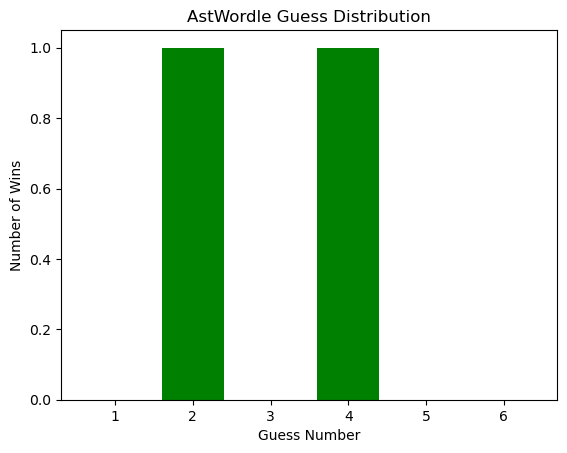

play again? yes/no:  yes
play again? yes/no:  yes


In [ ]:
##saving progress: git add ____, git commit -m "message", git push origin main

## importing ts
import numpy as np
import random
import matplotlib.pyplot as plt

## list of words
astro_words = [
    "Space", "Earth", "Lunar", "Solar",
    "Orbit", "Light", "Night", "Comet", 
    "Radio", "Pluto", "Alpha", "Venus",
    "Phase", "Flare",
    "Mount", "Aries", "Dwarf", "Orion",
    "Titan", "Bulge", "Libra", "Virgo",
    "Epoch", "Thebe", "Ceres", "Umbra", 
    "Helix", "Deneb", "Nadir", "Apsis",
    ]
## word selection moved after difficulty
guesses_left = 6
guesses_so_far = 0 # guesses # so far, will be printed after each guess
appended_guess = [] #list of guesses, will be printed after each guess
n = 0 #this is the thing that will count up to test each letter (see below)
appended_letters = [] #list of letters guessed so far
guessed_letter_colors = {} # maps letter to its most recent color code
colored_letters = [] #list of letters with colors, will be printed after each guess
##print(word, word_letters) ##remove this l8r(test)

#variables
guess_on_one = 0 
guess_on_two = 0
guess_on_three = 0 
guess_on_four = 0 
guess_on_five = 0
guess_on_six = 0 
loss_counter = 0
play = "yes"

print("AstWordle: Astronomy meets Wordle. ")
#game loop
while play=="yes":
    while True:  
        difficulty = input("choose your difficulty: easy, hard or ULTRAkill!!!: ").lower()
        if difficulty == "easy":
            astro_words_difficulty = astro_words[0:9]
            break
        elif difficulty == "hard":
            astro_words_difficulty = astro_words[10:19]
            break
        elif difficulty == "ultrakill":
            astro_words_difficulty = astro_words[20:29]
            break
        else:
            print("Please enter easy, hard, or ultrakill.")
    # Now select the word from the correct difficulty
    word = random.choice(astro_words_difficulty).upper()
    word_letters = list(word)
    print("you have 6 tries. after 3, you will be offered a hint.")
    ##loops until user imputs the right type of stuff

    while guesses_left > 0: #later add a nested thing where api gives hint if guesses_left == 3
        #-------this fat chunk of text will be the llm hint thing-------------
        # We will use this to suppress some warnings that are not important
        import warnings
        # Suppress specific Pydantic warnings that clutter the output
        warnings.filterwarnings("ignore", category=UserWarning, module="pydantic")
        # We will use dotenv to read the .env file
        from dotenv import load_dotenv
        load_dotenv()
        import litellm
        import os
        from sklearn.cluster import KMeans
        custom_api_base = "https://litellmproxy.osu-ai.org/"
        astro1221_key = os.getenv("ASTRO1221_API_KEY")
        warnings.filterwarnings("ignore", category=UserWarning, module="pydantic")
        #Removing unnecessary warnings."

        if guesses_left == 3:
            hint = input("do you want a hint? yes/no: ").lower()
            if hint == "yes":
                    response = litellm.completion(
                        model="openai/GPT-4.1-mini",
                        messages=[
                            {"role": "user", "content": f"The word is {word}. Give me a hint that will help me guess the word in less than 100 characters."}
                        ],
                        max_tokens=100,
                        api_base=custom_api_base,
                        api_key=astro1221_key,
                    )
                    print(response.choices[0].message.content)

        while True:
            guess = input("Enter a 5-letter word: ").upper()
            if len(guess) != 5:
                print("Please enter exactly 5 letters.")
                continue
            if not guess.isalpha():
                print("Please enter only letters.")
                continue
            break


#win conditions, helps keep track of wins per guess stats
        if guess == word and guesses_so_far == 0:
            guess_on_one += 1
            print(f"\x1b[46m congratulations you did it!! the word was {word}. you guessed it on guess #{guesses_so_far + 1}\x1b[0m")
            break
        elif guess == word and guesses_so_far == 1:
            guess_on_two += 1
            print(f"\x1b[46m congratulations you did it!! the word was {word}. you guessed it on guess #{guesses_so_far + 1}\x1b[0m")
            break
        elif guess == word and guesses_so_far == 2:
            guess_on_three += 1
            print(f"\x1b[46m congratulations you did it!! the word was {word}. you guessed it on guess #{guesses_so_far + 1}\x1b[0m")
            break
        elif guess == word and guesses_so_far == 3:
            guess_on_four += 1
            print(f"\x1b[46m congratulations you did it!! the word was {word}. you guessed it on guess #{guesses_so_far + 1}\x1b[0m")
            break
        elif guess == word and guesses_so_far == 4:
            guess_on_five += 1
            print(f"\x1b[46m congratulations you did it!! the word was {word}. you guessed it on guess #{guesses_so_far + 1}\x1b[0m")
            break
        elif guess == word and guesses_so_far == 5:
            guess_on_six += 1
            print(f"\x1b[46m congratulations you did it!! the word was {word}. you guessed it on guess #{guesses_so_far + 1}\x1b[0m")
            break

        
    
        # appended_guess.append(guess) #makes list of guesses so far
        
        guess_letters = list(guess) #turns guess into letters, separates them into diff strings to test
        

        for n in range(5):
            letter = guess_letters[n]
            # Determine color code for this letter in this guess
            if guess_letters[n] == word_letters[n]:
                color = '\x1b[102m'  # green
                colored_letters.append(f"\x1b[97m\x1b[102m{letter}\x1b[0m")
                print(f"in {guess}, \x1b[97m\x1b[102m{letter}\x1b[0m is correct and in the right position")
            elif letter in word_letters:
                color = '\x1b[103m'  # yellow
                colored_letters.append(f"\x1b[97m\x1b[103m{letter}\x1b[0m")
                print(f"in {guess}, \x1b[97m\x1b[103m{letter}\x1b[0m is correct but in the wrong position")
            elif letter not in word_letters:
                color = '\x1b[100m'  # gray
                colored_letters.append(f"\x1b[97m\x1b[100m{letter}\x1b[0m")
                print(f"in {guess}, \x1b[97m\x1b[100m{letter}\x1b[0m is not in the word")
            else:
                color = ''
            # Always update the color for the letter to the most recent
            guessed_letter_colors[letter] = color
            if letter not in appended_letters:
                appended_letters.append(letter)

        # Print colored guess for this round
        ("".join(colored_letters))
        n = 0

        guesses_left -= 1
        guesses_so_far += 1


        # Print all unique letters guessed so far (sorted, with color)
        print("letters guessed so far:")
        sorted_letters = sorted(appended_letters)
        colored_guessed = [f"{guessed_letter_colors[l]}{l}\x1b[0m" for l in sorted_letters]
        print(" ".join(colored_guessed))
        print(f"you have {guesses_left} guesses left")

        if guesses_left <= 0:
            print(f"\x1b[31m*extremely loud incorrect buzzer*\x1b[0m] nah bru it was {word}")
            loss_counter += 1
            break

        
    
    print({guess_on_one}, {guess_on_two}, {guess_on_three}, {guess_on_four}, {guess_on_five}, {guess_on_six})
    guess_graph_x = ['1', '2', '3', '4', '5', '6'] #x axis for graph, will be used to show how many guesses it took to win
    guess_graph_y = [guess_on_one, guess_on_two, guess_on_three, guess_on_four, guess_on_five, guess_on_six] 
    plt.bar(guess_graph_x, guess_graph_y, color='green') #makes the graph
    plt.xlabel('Guess Number') #x axis label    
    plt.ylabel('Number of Wins') #y axis label
    plt.title("AstWordle Guess Distribution") #title of graph
    plt.show() #shows the graph

    #resetting variables for next game
    guesses_left = 6
    guesses_so_far = 0 
    appended_guess = [] 
    appended_letters = [] 
    guessed_letter_colors = {} 
    colored_letters = [] 

     #asking user to play again
    while True:
        play=input("play again? yes/no: ").lower()
        if not play == "yes" or play == "no":
            print("Please enter yes or no.")
            continue
        break
     


    